# Lab 04: Part 2
# Bootstrap of a regression model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model

## 1. Building a linear model

In [3]:
# Data: 1000 births from North Carolina
# https://www.openintro.org/stat/data/?data=nc
# We are interested in the link between 
# Weeks: gestation time (length of the pregnancy in weeks) 
# Weigh: Birth weight im pounds

D = pd.read_csv('nc.csv')

In [4]:
# Check for missing data and exclude observations
print("Number of NaN:",sum(np.isnan(D.weeks)))
D = D[~np.isnan(D.weeks)]


Number of NaN: 2


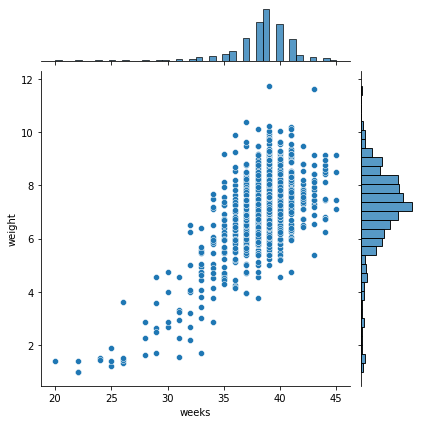

In [5]:
# Make a Joint plot between weeks and weight
sns.jointplot(data=D, x='weeks', y='weight')

In [6]:
# Train a model on the training set 
regr = sklearn.linear_model.LinearRegression()
X_fit = np.c_[D.weeks, D.weeks**2, D.weeks**3]
regr.fit(X_fit, D.weight)
regr.coef_

array([-5.21866875e+00,  1.78832738e-01, -1.85596626e-03])

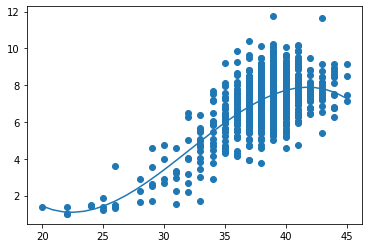

In [7]:
# Plot the Fit of model 
plt.scatter(D.weeks, D.weight)
p_weeks = np.linspace(20, 45, 30)
X_pred = np.c_[p_weeks, p_weeks**2, p_weeks**3]
p_weight = regr.predict(X_pred)
plt.plot(p_weeks, p_weight)

## 2. Bootstrap the model parameters

In [8]:
# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data):
    numboot = 1000
    n = len(data)
    theta = np.zeros((numboot,3))
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_boot = np.c_[d.weeks, d.weeks**2, d.weeks**3]
        regr.fit(X_boot, d.weight)
        theta[i,:]=regr.coef_
    return theta 


In [9]:
# Get 1000 Bootstrap fits
thetaBS = BootstrapCoef(D)
thetaBS

array([[-6.52903278e+00,  2.18747283e-01, -2.25598978e-03],
       [-5.92411099e+00,  1.97954508e-01, -2.02221268e-03],
       [-6.09588786e+00,  2.06032792e-01, -2.13194676e-03],
       ...,
       [-5.60907543e+00,  1.91838098e-01, -1.99260288e-03],
       [-5.04714053e+00,  1.73112143e-01, -1.79370266e-03],
       [-4.43635578e+00,  1.54579743e-01, -1.61462889e-03]])

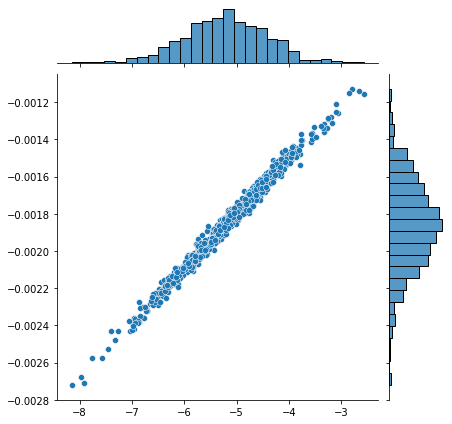

In [10]:
# Make a joint plot of two parameters 
sns.jointplot(x=thetaBS[:,0], y=thetaBS[:,2])

## 3. Prediction bootstrap

In [11]:
# Write a Bootstrap function that records the fitted models 
def BootstrapPred(data, xp):
    numboot = 1000
    n = len(data)
    theta = np.zeros((numboot,3))
    X_pred = np.c_[xp, xp**2, xp**3]
    y_pred = np.zeros((numboot, xp.shape[0]))
    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        X_boot = np.c_[d.weeks, d.weeks**2, d.weeks**3]
        regr.fit(X_boot, d.weight)
        regr.predict(X_pred)
        y_pred[i,:]=regr.predict(X_pred)

    return y_pred 


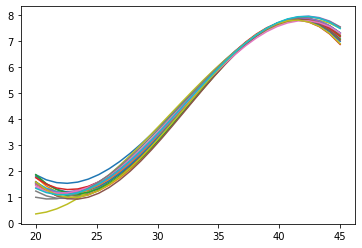

In [12]:
# Plot 20 of the bootstrapped predictions 

y_pred = BootstrapPred(D,p_weeks)

for i in range(20):
    plt.plot(p_weeks, y_pred[i,:])

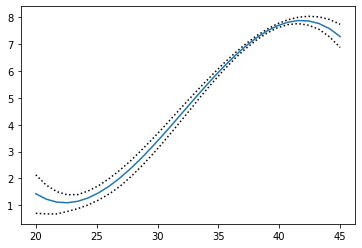

In [13]:
# Caluculate upper and lower confidence bounds for prediction 
# From Bootstrapped means 
upper = np.quantile(y_pred-p_weight, 0.975, axis=0)
lower = np.quantile(y_pred-p_weight, 0.0275, axis=0)
plt.plot(p_weeks, p_weight)
plt.plot(p_weeks, p_weight-upper, 'k:')
plt.plot(p_weeks, p_weight-lower, 'k:')


#Prked
# def BootstrapCoef(data, numboot=1000):
#     
#     theta = np.zeros((numboot, 3))
#     sample_model = linear_model.LinearRegression()
#     # Bootstrap numbot times
#     for i in range(numboot):
#         
#         # Sample Data
#         sample_data = data.sample(n=25, replace=True)
#         s_y = sample_data.wt.values.reshape(-1,1)
#         s_x = sample_data.ht.values.reshape(-1,1)
# 
#         x_boot = np.c_[s_x, s_x**2, s_x**3]
#         sample_model.fit(x_boot, s_y)
#         theta[i,:] = sample_model.coef_
#   
#     return theta
# 
# def BootstrapPred(data, xp, numboot=1000):
# 
#     n = len(data)
#     regression_model = sklearn.linear_model.LinearRegression()
#     
#     X_pred = np.c_[xp, xp**2, xp**3]
#     y_pred = np.zeros((numboot, xp.shape[0]))
#     
#     for i in range(numboot):
#         d = data.sample(n, replace=True)
#         # X_boot = np.c_[d.ht, d.ht**2, d.ht**3]
#         regression_model.fit(d.ht, d.wt)
#         y_pred[i,:]=regression_model.predict(X_pred)
# 
#     return y_pred 